# WeRateDogs Data Wrangling Project

In [128]:
#import libraries
import numpy as np                                                                 
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

import warnings; warnings.simplefilter('ignore')

# Table of Contents

1. [Data Gathering](#DG)
2. [Assessing Data](#AD)
3. [Quality Issues](#QI)

## [Data Gathering](#DG)
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [129]:
#Read Twitter archive file
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [130]:
#import the predictions via request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(r.content)

In [131]:
#Read file and view it
image = pd.read_csv('image-predictions.tsv', sep='\t')

image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [132]:
#Download the tweet info from the Twitter API. 
#store information in a list to be used later.
consumer_key = '0QsRqXOG3WLEoOiJufflSZznl'
consumer_secret = 'jVYNpV30NoKXMfGH6qLFEhiJ4v2k1K0Ou3JoT9Dr7zvE9HSVnG'
access_token = '849814388043386880-bQo3ZrnKy7NcnQfl9deZxrRtt6VsQSA'
access_secret = '2KiFp52TmlEi1p4fdD7BtCGfb4Z9wM25KB9sCMaesDpAL'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAO3whQEAAAAAVwqxJmtI8DNWar1V%2FKQhMIbLsYI%3Dn2NY6jXdwQEhlOVQsoffSejNsuVx63nBJVhopYDdRfaBJYBAMv'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

client = tweepy.Client(bearer_token = bearer_token, wait_on_rate_limit = True)

info = ['public_metrics']

tweet_ids = twitter.tweet_id.values
example_tweet = tweet_ids[0]

print(f'Querying API for tweet: {example_tweet}\n')

tweet_fields = ['created_at', 'id', 'public_metrics', 'source', 'text']

temp_data = client.get_tweet(id = example_tweet, tweet_fields = tweet_fields)

print(f'{temp_data.data}\n')

if temp_data.data.get('public_metrics'):
        print(f"{temp_data.data['public_metrics']=}")
        
tweet_info = []
for ind, tweet_id in enumerate(twitter.tweet_id):
    public_metrics = {}
    public_metrics['tweet_id'] = tweet_id
   
    if temp_data.data:
        if temp_data.data.get('public_metrics'):
            for key, value in temp_data.data['public_metrics'].items():
                public_metrics[key] = value
    tweet_info.append(public_metrics)

    if ind == 100:
    
        break

Querying API for tweet: 892420643555336193

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU

temp_data.data['public_metrics']={'retweet_count': 6944, 'reply_count': 139, 'like_count': 33596, 'quote_count': 219}


In [133]:
tweet_count = pd.DataFrame(tweet_info, columns = ['tweet_id', 'retweet_count', 'reply_count', 'like_count', 'quote_count'])

In [134]:
tweet_info

[{'tweet_id': 892420643555336193,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quote_count': 219},
 {'tweet_id': 892177421306343426,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quote_count': 219},
 {'tweet_id': 891815181378084864,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quote_count': 219},
 {'tweet_id': 891689557279858688,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quote_count': 219},
 {'tweet_id': 891327558926688256,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quote_count': 219},
 {'tweet_id': 891087950875897856,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quote_count': 219},
 {'tweet_id': 890971913173991426,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quote_count': 219},
 {'tweet_id': 890729181411237888,
  'retweet_count': 6944,
  'reply_count': 139,
  'like_count': 33596,
  'quot

In [135]:
tweet_count

,tweet_id,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,6944,139,33596,219
1,892177421306343426,6944,139,33596,219
2,891815181378084864,6944,139,33596,219
3,891689557279858688,6944,139,33596,219
4,891327558926688256,6944,139,33596,219
5,891087950875897856,6944,139,33596,219
6,890971913173991426,6944,139,33596,219
7,890729181411237888,6944,139,33596,219
8,890609185150312448,6944,139,33596,219
9,890240255349198849,6944,139,33596,219


In [136]:
def tweet_extraction():
    count = 0
    fails_dict = {}
    start= timer()

    print('Initializing Data Query...')
    with open('tweet_json.txt', 'w') as f:
        for tweet_id in twitter['tweet_id']:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = client.get_tweet(tweet_id)
                json.dump(tweet_id, f)
                f.write('\n')
                print(tweet_id)
            except tweepy.TweepError as e:
                print(tweet_id)
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(fails_dict)
    print(end - start)

In [137]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [138]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [139]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [140]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## [Assessing Data](#AD)
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [141]:
#increasing the column width so that the whole text in the 'text' column is visible.
pd.set_option('display.max_colwidth', -1)

In [142]:
# increasing the max rows that can be viewed.
pd.options.display.max_rows = 2000

In [143]:
#Displaying random tweets to see if there are any retweets on the table.
twitter.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1",12,10,Zeus,None,None,None,None
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scott. Just trying to catch his train to work. Doesn't need everybody staring. 9/10 ignore the haters pupper https://t.co/jyXbZ35MYz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978741354496/photo/1,9,10,Scott,None,None,pupper,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Churlie. He likes bagels. 10/10 https://t.co/k8P6FZlzAG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/668633411083464705/photo/1,https://twitter.com/dog_rates/status/668633411083464705/photo/1",10,10,Churlie,None,None,None,None
380,827600520311402496,NaN,NaN,2017-02-03 19:31:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tucker. It's his birthday. He's pupset with you because you're too busy playing @GoodDogsGame to celebrate. 13/10 would put down phone https://t.co/vrppizPGdb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827600520311402496/photo/1,13,10,Tucker,None,None,None,None
1730,679854723806179328,NaN,NaN,2015-12-24 02:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. He's a rare pup. Covered in Frosted Flakes. Nifty gold teeth. Overall good dog. 7/10 would pet firmly https://t.co/RtxxACzZ8A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679854723806179328/photo/1,7,10,Bruce,None,None,None,None
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doug. He's trying to float away. 12/10 you got this Doug https://t.co/bZaHC3lvTL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199639494656/photo/1,12,10,Doug,None,None,None,None
892,759447681597108224,NaN,NaN,2016-07-30 17:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oakley. He has no idea what happened here. Even offered to help clean it up. 11/10 such a heckin good boy https://t.co/vT3JM8b989,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759447681597108224/photo/1,11,10,Oakley,None,None,None,None


In [144]:
#Check if there are any retweets to verify there are only original tweets.
#All the tweets should be True as the retweeted_status_id
twitter.retweeted_status_id.isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: retweeted_status_id, Length: 2356, dtype: bool

In [145]:
#Check if there are any null explanded urls.
twitter_nan = twitter['expanded_urls'].isnull().values.any()
print(twitter_nan)

True


In [146]:
image.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
1172,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True
741,687317306314240000,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1,Shih-Tzu,0.747208,True,Maltese_dog,0.091025,True,Lhasa,0.035788,True
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,0.000077,True,menu,0.000002,False
63,667165590075940865,https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg,1,miniature_pinscher,0.140173,True,Rottweiler,0.134094,True,beagle,0.081900,True
1653,809920764300447744,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,1,Norwich_terrier,0.397163,True,toy_poodle,0.274540,True,miniature_poodle,0.134667,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [147]:
twitter[twitter.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitt

In [148]:
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
2       9  
1       9  
75      2  
15      2  
420     2  
0       2  
80      1  
144     1  
17      1  
26      1  
20      1  
121     1  
143     1  
44      1  
60      1  
45      1  
50      1  
99      1  
204     1  
1776    1  
165     1  
666     1  
27      1  
182     1  
24      1  
960     1  
84      1  
88      1  
Name: rating_numerator, dtype: int64

In [149]:
#Display the rating numerator to compare numbers to see if there are any irregularities.
twitter.query('rating_numerator >= 15')['text']

55      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                              
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
285     RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI                                                                          
290     @markhoppus 182/10                                                                                                                                                       
291     @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10                                       

In [150]:
twitter.rating_denominator.value_counts()

10     2333
11     3   
50     3   
20     2   
80     2   
70     1   
7      1   
15     1   
150    1   
170    1   
0      1   
90     1   
40     1   
130    1   
110    1   
16     1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

In [151]:
twitter.query('rating_denominator != 10')['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

## [Quality issues](#QI)
1. The tweet_id should be a string instead of an int, because we will not be performing any calculations with that information.

2. The name column in the Twitter table contains both proper names and what seems to be part of a string pulled out of context.

3. The rating numerator has a majority of ratings within the numbers 12, 11, 10, 13. there are some numbers that aren't as accurate in the data like; 1776 and 666 to be a numerator seems inaccurate and also not a common entry.

4. The rating denominator for the majority of ratings is 10. there are stray numbers that only have one entry. 

5. Timestamp should be a datetime instead of an int.

6. The expanded_urls columns holds some NAN values and should be dropped from the column.


7. The types of dogs in columns p1, p2, and p3 shold be uniform in appearance instead of uppercase and lowercase letters.


8.  In the Twitter table I was able to observe a few columns that have a majority of rows that have a null value. The columns are; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. I plan on removing theses columns for my final table. 

9. Source doesnt add any necessary info so I will drop this column.

### Tidiness issues
1. The columns p1, p2, p3 as well as the confidence and prediction result can be consolidated to 3 columns.
2. I want to place the dog stages in one column to save space. Doggo, Floofer, Pupper and Puppo.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [152]:
# Make copies of original pieces of data I created 3 tables that I want to clean.

twitter_clean = twitter.copy()
image_clean = image.copy()
tweet_count_clean = tweet_count.copy()

### Issue #1: Cleaning the Twitter table

#### Define: Remove any duplicates in the twitter dataset.

#### Code

In [153]:
twitter_clean.drop_duplicates()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [154]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define: Only original tweets are needed for this project so any retweeted_status_id and in_reply_to_status_id columns can be dropped.

#### Code

In [155]:
#creating an index for both retweets and replies that will be dropped.
retweet_drop = twitter_clean[pd.notnull(twitter_clean['retweeted_status_id'])].index
reply_drop = twitter_clean[pd.notnull(twitter_clean['in_reply_to_status_id'])].index

In [156]:
#dropping the rewteets and replies 
twitter_clean.drop(index=retweet_drop, inplace=True)
twitter_clean.drop(index=reply_drop, inplace=True)

#### Test

In [157]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define: Change the dtype of the tweet_id, timestamp, rating_numerator and rating_denominator to be more accurate.

### Code

In [158]:
# Change datatype for tweet_id, timestamp, rating_numerator and rating_denominator to be more accurate.
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp, yearfirst = True)
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype(float)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.astype(float)

### Test

In [159]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

#### Define: Changing timestamp column to date and time to read easier.

### Code

In [160]:
# apply the strftime function to the timestamp to achieve to seperate columns.
twitter_clean['date'] = twitter_clean['timestamp'].apply(lambda x: x.strftime('%m-%d-%Y'))
twitter_clean['time'] = twitter_clean['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

#changing datatype of the date column to datetime
twitter_clean.date = pd.to_datetime(twitter_clean.date, dayfirst = True)

In [161]:
#remove the timestamp column because it isn't necessary now.
twitter_clean = twitter_clean.drop('timestamp', axis = 1)

### Test

In [162]:
#View the table to see the new columns
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None,2017-01-08,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None,2017-01-08,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None,2017-07-29,16:00:24


#### Define: Identify rows in name column that aren't a name.

### Code

In [163]:
#There are names on the table so I am going to see if there is any significance.
twitter_clean.name.value_counts()

None              603
a                 55 
Lucy              11 
Charlie           11 
Oliver            10 
Cooper            10 
Penny             9  
Tucker            9  
Sadie             8  
Winston           8  
the               8  
Lola              8  
Daisy             7  
Toby              7  
Jax               6  
Bailey            6  
Koda              6  
an                6  
Stanley           6  
Oscar             6  
Bella             6  
Bo                6  
Buddy             5  
Bentley           5  
Rusty             5  
Milo              5  
Chester           5  
Louis             5  
Dave              5  
Leo               5  
Scout             5  
Oakley            4  
Sophie            4  
Archie            4  
Jack              4  
Alfie             4  
George            4  
Winnie            4  
Brody             4  
Boomer            4  
Finn              4  
very              4  
Chip              4  
Jerry             4  
Maggie            4  
Cassie    

In [164]:
#Remove lowercase names from the name list.
twitter_clean['name'] = twitter_clean['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [165]:
#Check to see if there are any lowercase names left in the list.
twitter_clean[twitter_clean.name.str.lower() == twitter_clean.name].name.unique()

array([], dtype=object)

### Test

In [166]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   source                      2097 non-null   object        
 4   text                        2097 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               2094 non-null   object        
 9   rating_numerator            2097 non-null   float64       
 10  rating_denominator          2097 non-null   float64       
 11  name                        1993 non-null   object      

### Define: Take the columns; doggo, floofer, pupper, puppo and merge into uniform column.

### Code

In [167]:
# Locate all of the variations of spelling before merging into a column
twitter_clean['doggo'] = twitter_clean['text'].str.extract('([Dd]+[Oo]+[Gg]+[Oo]+[Ss]*)')
twitter_clean['floofer'] = twitter_clean['text'].str.extract('([Ff]+[Ll]+[Oo]+[Ff]+[Ee]+[Rr]+[Ss]*)')
twitter_clean['pupper'] = twitter_clean['text'].str.extract('([Pp]+[Uu]+[Pp]+[Ee]+[Rr]+[Ss]*)')
twitter_clean['puppo'] = twitter_clean['text'].str.extract('([Pp]+[Uu]+[Pp]+[Oo]+[Ss]*)')

In [168]:
twitter_clean['doggo'].value_counts()

doggo     75
doggos    8 
Doggo     7 
DOGGO     1 
Name: doggo, dtype: int64

In [169]:
twitter_clean['floofer'].value_counts()

Floofer    6
floofer    4
Name: floofer, dtype: int64

In [170]:
twitter_clean['pupper'].value_counts()

pupper     221
puppers    22 
Pupper     8  
PUPPER     4  
Name: pupper, dtype: int64

In [171]:
twitter_clean['puppo'].value_counts()

puppo     28
Puppo     1 
puppos    1 
Name: puppo, dtype: int64

In [172]:
#Create a column that holds the columns, 'doggo', 'floofer', 'pupper', 'puppo'. Let's call them nickname
#Using the loc method to add new column
twitter_clean.loc[twitter_clean['doggo'] == 'doggo', 'nickname'] = 'doggo'
twitter_clean.loc[twitter_clean['floofer'] == 'floofer', 'nickname'] = 'floofer'
twitter_clean.loc[twitter_clean['pupper'] == 'pupper', 'nickname'] = 'pupper'
twitter_clean.loc[twitter_clean['puppo'] == 'puppo', 'nickname'] = 'puppo'

In [173]:
#let's see if our nickname holds all of the other columns.
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,nickname
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,2017-01-08,16:23:56,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,2017-01-08,00:17:27,NaN
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN,2017-07-31,00:18:03,NaN
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN,2017-07-30,15:58:51,NaN
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN,2017-07-29,16:00:24,NaN


In [174]:
#Dropping the unnecessary nickname columns like their hot.
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

### Test

In [175]:
twitter_clean.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,nickname
1633,684241637099323392,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Obi. He got camera shy. 12/10 https://t.co/feiPiq7z94,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1",12.0,10.0,Obi,2016-05-01,05:14:53,NaN
2123,670385711116361728,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Larry. He's a Panoramic Benzoate. Can shoot lasers out of his eyes. Very neat. Stuck in that position tho. 8/10 https://t.co/MAZx8MPF0S,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711116361728/photo/1,8.0,10.0,Larry,2015-11-27,23:36:23,NaN
1744,679158373988876288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373988876288/photo/1,11.0,10.0,Rubio,2015-12-22,04:35:49,NaN
1664,682788441537560576,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy New Year from your fav holiday squad! 🎉 12/10 for all\n\nHere's to a pupper-filled year 🍻🐶🐶🐶 https://t.co/ZSdEj59FGf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441537560576/photo/1,12.0,10.0,None,2016-01-01,05:00:24,pupper
667,790337589677002753,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Maggie. She can hear your cells divide. 12/10 can also probably fly https://t.co/ovE2hqXryV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589677002753/photo/1,12.0,10.0,Maggie,2016-10-23,23:42:19,NaN
454,818536468981415936,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tom. He's a silly dog. Known for his unconventional swing style. One h*ck of a sneaky tongue slip too. 11/10 would push https://t.co/6fSVcn9HAU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818536468981415936/photo/1,11.0,10.0,Tom,2017-09-01,19:14:36,NaN
1320,706346369204748288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. She's a Beneboom Cumberwiggle. 12/10 petable as hell https://t.co/VZV6oMJmU6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/706346369204748288/photo/1,https://twitter.com/dog_rates/status/706346369204748288/photo/1",12.0,10.0,Koda,2016-06-03,05:11:12,NaN


### Define: The  columns seem mixed together is difficult to see.

### Code

In [176]:
twitter_clean = twitter_clean[['tweet_id', 'name','nickname', 'rating_numerator', 'rating_denominator', 'text', 'date', 'time']]

### Test

In [177]:
twitter_clean.head()

,tweet_id,name,nickname,rating_numerator,rating_denominator,text,date,time
0,892420643555336193,Phineas,NaN,13.0,10.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-01-08,16:23:56
1,892177421306343426,Tilly,NaN,13.0,10.0,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-01-08,00:17:27
2,891815181378084864,Archie,NaN,12.0,10.0,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,2017-07-31,00:18:03
3,891689557279858688,Darla,NaN,13.0,10.0,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,2017-07-30,15:58:51
4,891327558926688256,Franklin,NaN,12.0,10.0,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",2017-07-29,16:00:24


In [178]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       101 non-null    int64
 1   retweet_count  101 non-null    int64
 2   reply_count    101 non-null    int64
 3   like_count     101 non-null    int64
 4   quote_count    101 non-null    int64
dtypes: int64(5)
memory usage: 4.1 KB


In [179]:
#change dtype for tweet_id
tweet_count.tweet_id = tweet_count.tweet_id.astype(str)

In [180]:
#Change names
tweet_count.rename(index = str, columns ={'tweet_id': 'Tweet_ID', 'retweet_count': 'Retweet_Count', 'reply_count': 'Reply_Count',
                                 'like_count': 'Like_Count', 'quote_count': 'Quote_Count'}, inplace=True)
tweet_count.head()


,Tweet_ID,Retweet_Count,Reply_Count,Like_Count,Quote_Count
0,892420643555336193,6944,139,33596,219
1,892177421306343426,6944,139,33596,219
2,891815181378084864,6944,139,33596,219
3,891689557279858688,6944,139,33596,219
4,891327558926688256,6944,139,33596,219


In [181]:
#Merge the twitter table and the tweet_count table
Twitter_clean = twitter_clean.join(tweet_count.set_index('Tweet_ID'), on='tweet_id')
Twitter_clean.head()

,tweet_id,name,nickname,rating_numerator,rating_denominator,text,date,time,Retweet_Count,Reply_Count,Like_Count,Quote_Count
0,892420643555336193,Phineas,NaN,13.0,10.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-01-08,16:23:56,6944.0,139.0,33596.0,219.0
1,892177421306343426,Tilly,NaN,13.0,10.0,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-01-08,00:17:27,6944.0,139.0,33596.0,219.0
2,891815181378084864,Archie,NaN,12.0,10.0,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,2017-07-31,00:18:03,6944.0,139.0,33596.0,219.0
3,891689557279858688,Darla,NaN,13.0,10.0,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,2017-07-30,15:58:51,6944.0,139.0,33596.0,219.0
4,891327558926688256,Franklin,NaN,12.0,10.0,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",2017-07-29,16:00:24,6944.0,139.0,33596.0,219.0


### Issue #2: Cleaning the Image table

In [182]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define Let's consolidate all of the dog breeds found in p1, p2, p3 into one column. All the prediction confidence as well as the result of the predictions into a their own columns.

#### Code

In [183]:
# referencing help from, https://github.com/evanchen13/weratedogs/blob/master/wrangle_act.ipynb

def breeds(p1, p2, p3, value_name):
    '''
    INPUT:
    p1 (str) - first column of predicted breed
    p2 (str) - second column for breed prediction
    p3 (str) - third column for breed prediction
    value_name (str) - new column name to hold all breed predictions
    
    OUTPUT:
    Dataframe that holds the combined names from the 3 columns.
    '''
    
    db = image_clean[['tweet_id', 'jpg_url', 'img_num', p1, p2, p3]]
    # rename column names for easier input for the value_ vars list
    db.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
    db = pd.melt(
        db,
        id_vars=['tweet_id', 'jpg_url', 'img_num'],
        value_vars=[1, 2, 3],
        var_name='breed_num',
        value_name=value_name
    )
    return db

In [184]:
dog_breed = breeds('p1', 'p2', 'p3', 'breed')

In [185]:
breed_confidence = breeds('p1_conf', 'p2_conf', 'p3_conf', 'confidence')

In [186]:
dog_prediction = breeds('p1_dog', 'p2_dog', 'p3_dog', 'prediction')

In [187]:
# merge the three dataframes
image_clean = dog_breed.merge(
    breed_confidence,
    how = 'inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'breed_num']
)

In [188]:
image_clean = image_clean.merge(
    dog_prediction,
    how = 'inner',
    on = ['tweet_id', 'jpg_url', 'img_num', 'breed_num']
)

#### Test

In [189]:
image_clean.head()

,tweet_id,jpg_url,img_num,breed_num,breed,confidence,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True


#### Define: Cleaning the breed column to be presented neater. The "_" should be removed and spaces in between and all the words should be capitolized.

### Code

In [190]:
image_clean.breed.value_counts()

golden_retriever                  290
Labrador_retriever                283
Chihuahua                         185
Pembroke                          143
Cardigan                          115
Pomeranian                        109
toy_poodle                        105
pug                               97 
chow                              96 
cocker_spaniel                    95 
French_bulldog                    93 
Chesapeake_Bay_retriever          91 
Eskimo_dog                        83 
beagle                            77 
kuvasz                            76 
Siberian_husky                    72 
Samoyed                           70 
Staffordshire_bullterrier         70 
malamute                          69 
Pekinese                          63 
kelpie                            62 
American_Staffordshire_terrier    58 
miniature_pinscher                57 
Great_Pyrenees                    55 
miniature_poodle                  54 
collie                            51 
Italian_grey

In [191]:
#Remove the underscore and replace with a space for a cleaner appearance.
image_clean.breed = image_clean.breed.str.replace('_', ' ')
image_clean.sample(7)

,tweet_id,jpg_url,img_num,breed_num,breed,confidence,prediction
502,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,1,golden retriever,0.263892,True
2650,678643457146150913,https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg,1,2,flat-coated retriever,0.304470,True
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,1,seat belt,0.787164,False
5714,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,3,kuvasz,0.015965,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,1,standard poodle,0.351308,True
837,694329668942569472,https://pbs.twimg.com/media/CaLBJmOWYAQt44t.jpg,1,1,boxer,0.990060,True
2165,667538891197542400,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,2,silky terrier,0.300313,True


In [192]:
#Make the breed predictions first letter uppercase.
image_clean.breed = image_clean.breed.str.title()
image_clean.sample(7)


,tweet_id,jpg_url,img_num,breed_num,breed,confidence,prediction
1363,761334018830917632,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,1,1,Norwegian Elkhound,0.822936,True
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,1,Shopping Cart,0.572349,False
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,1,Ice Bear,0.336200,False
3310,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,2,Lakeland Terrier,0.234458,True
860,696900204696625153,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1,1,Chihuahua,0.297735,True
1870,844704788403113984,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,1,Labrador Retriever,0.980213,True
2277,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,2,Chihuahua,0.000605,True


### Test

In [193]:
image_clean.breed.value_counts()

Golden Retriever                  290
Labrador Retriever                283
Chihuahua                         185
Pembroke                          143
Cardigan                          116
Pomeranian                        109
Toy Poodle                        105
Pug                               97 
Chow                              96 
Cocker Spaniel                    95 
French Bulldog                    93 
Chesapeake Bay Retriever          91 
Eskimo Dog                        83 
Beagle                            77 
Kuvasz                            76 
Siberian Husky                    72 
Samoyed                           70 
Staffordshire Bullterrier         70 
Malamute                          69 
Pekinese                          63 
Kelpie                            62 
American Staffordshire Terrier    58 
Miniature Pinscher                57 
Great Pyrenees                    55 
Miniature Poodle                  54 
Collie                            51 
German Sheph

### Final table check before merge

### Define: Make sure that the datatypes are correct before merging the two tables

### Code

In [194]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6225 non-null   int64  
 1   jpg_url     6225 non-null   object 
 2   img_num     6225 non-null   int64  
 3   breed_num   6225 non-null   object 
 4   breed       6225 non-null   object 
 5   confidence  6225 non-null   float64
 6   prediction  6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 346.5+ KB


In [195]:
#change tweet_id dtype to match twitter_clean table tweet_id for easy merge
image_clean.tweet_id = image_clean.tweet_id.astype(str)

### Test

In [196]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6225 non-null   object 
 1   jpg_url     6225 non-null   object 
 2   img_num     6225 non-null   int64  
 3   breed_num   6225 non-null   object 
 4   breed       6225 non-null   object 
 5   confidence  6225 non-null   float64
 6   prediction  6225 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 346.5+ KB


### Merge Time: Merging the Twitter dataset and the Image dataset into one table.

### Code

In [197]:
#Combine tables for one complete table of information.
twitter_image = Twitter_clean.join(image_clean.set_index('tweet_id'), on='tweet_id')
twitter_image.head()

,tweet_id,name,nickname,rating_numerator,rating_denominator,text,date,time,Retweet_Count,Reply_Count,Like_Count,Quote_Count,jpg_url,img_num,breed_num,breed,confidence,prediction
0,892420643555336193,Phineas,NaN,13.0,10.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-01-08,16:23:56,6944.0,139.0,33596.0,219.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,1,Orange,0.097049,False
0,892420643555336193,Phineas,NaN,13.0,10.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-01-08,16:23:56,6944.0,139.0,33596.0,219.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,2,Bagel,0.085851,False
0,892420643555336193,Phineas,NaN,13.0,10.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-01-08,16:23:56,6944.0,139.0,33596.0,219.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,3,Banana,0.076110,False
1,892177421306343426,Tilly,NaN,13.0,10.0,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-01-08,00:17:27,6944.0,139.0,33596.0,219.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,1,Chihuahua,0.323581,True
1,892177421306343426,Tilly,NaN,13.0,10.0,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-01-08,00:17:27,6944.0,139.0,33596.0,219.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,2,Pekinese,0.090647,True


### Final table clean up

### Define: To make the table clearer I will rearrange the column placement and change and capitolize name to have a cleaner look.

### Code

In [198]:
#Change the column names to be more uniform and easier to read.
twitter_image.rename(index = str, columns = {'tweet_id' : 'Tweet_ID', 'name' : 'Name', 'nickname' : 'Nickname',
                                             'rating_numerator' : 'Rating_Numerator', 'rating_denominator' : 'Rating_Denominator',
                                             'text' : 'Text', 'date' : 'Date', 'time' : 'Time', 'jpg_url' : 'Jpg_Url',
                                            'img_num' : 'Img_Num', 'breed_num' : 'Breed_Num', 'breed' : 'Breed',
                                            'confidence' : 'Confidence', 'prediction': 'Prediction'}, inplace = True)


### Test

In [199]:
twitter_image.sample(7)

,Tweet_ID,Name,Nickname,Rating_Numerator,Rating_Denominator,Text,Date,Time,Retweet_Count,Reply_Count,Like_Count,Quote_Count,Jpg_Url,Img_Num,Breed_Num,Breed,Confidence,Prediction
223,849412302885593088,Noosh,NaN,12.0,10.0,This is Noosh. He noticed you were in the shower and thought you could use some company. 12/10 h*ckin loyal https://t.co/Uq3ChFgWA3,2017-05-04,00:04:08,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4.0,3,Chihuahua,0.016191,True
1102,735274964362878976,None,NaN,11.0,10.0,We only rate dogs. Please stop sending in your 31 year old sons that won't get out of your house. Thank you... 11/10 https://t.co/aTU53NNUkt,2016-05-25,01:03:06,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CjQ4radW0AENP-m.jpg,1.0,1,Studio Couch,0.944692,False
1515,690989312272396288,None,NaN,12.0,10.0,We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy https://t.co/pmarb2dG0e,2016-01-23,20:07:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,692530551048294401,Cody,NaN,10.0,10.0,Say hello to Cody. He's been to like 80 countries and is way more cultured than you. He wanted me to say that. 10/10 https://t.co/Iv3flDTpXu,2016-01-28,02:12:04,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1.0,3,White Wolf,0.041506,False
405,823939628516474880,Cash,NaN,12.0,10.0,This is Cash. He's officially given pup on today. 12/10 frighteningly relatable https://t.co/m0hrATIEyw,2017-01-24,17:04:50,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1.0,2,Curly-Coated Retriever,0.193093,True
2031,671768281401958400,None,NaN,10.0,10.0,When you try to recreate the scene from Lady &amp; The Tramp but then remember you don't have a significant other. 10/10 https://t.co/TASnD8Q08S,2015-01-12,19:10:13,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2.0,1,Chihuahua,0.500373,True
617,796387464403357696,Snicku,NaN,12.0,10.0,This is Snicku. He's having trouble reading because he's a dog. Glasses only helped a little. Nap preferred. 12/10 would snug well https://t.co/cVLUasbKA5,2016-09-11,16:22:22,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1.0,3,Siamese Cat,0.052423,False


In [200]:
#Create a dataframe for the two seperate dog predications. One dataframe contains the true predictions, while the other holds the false.
dogs = twitter_image[twitter_image.Prediction == True]
none_dog = twitter_image[twitter_image.Prediction == False]

In [201]:
print(dogs)

                Tweet_ID    Name Nickname  Rating_Numerator  \
1     892177421306343426  Tilly   NaN      13.0               
1     892177421306343426  Tilly   NaN      13.0               
1     892177421306343426  Tilly   NaN      13.0               
2     891815181378084864  Archie  NaN      12.0               
2     891815181378084864  Archie  NaN      12.0               
...                  ...     ...  ...       ...               
2354  666029285002620928  NaN     NaN      7.0                
2354  666029285002620928  NaN     NaN      7.0                
2355  666020888022790149  None    NaN      8.0                
2355  666020888022790149  None    NaN      8.0                
2355  666020888022790149  None    NaN      8.0                

      Rating_Denominator  \
1     10.0                 
1     10.0                 
1     10.0                 
2     10.0                 
2     10.0                 
...    ...                 
2354  10.0                 
2354  10.0         

### Code

In [202]:
#For a more readable table the quantitative information will be to the left to be seen first then the categorical information
twitter_list = list(twitter_image.columns)
print(twitter_list)

['Tweet_ID', 'Name', 'Nickname', 'Rating_Numerator', 'Rating_Denominator', 'Text', 'Date', 'Time', 'Retweet_Count', 'Reply_Count', 'Like_Count', 'Quote_Count', 'Jpg_Url', 'Img_Num', 'Breed_Num', 'Breed', 'Confidence', 'Prediction']


In [203]:
twitter_list = ['Tweet_ID',  'Date', 'Time', 'Name','Rating_Numerator', 'Rating_Denominator', 'Retweet_Count', 'Reply_Count', 'Like_Count', 'Quote_Count',
                'Img_Num','Breed_Num', 'Confidence', 'Nickname', 'Text', 'Jpg_Url', 'Breed', 'Prediction']

twitter_image = twitter_image[twitter_list]

### Test

In [204]:
twitter_image.sample(7)

,Tweet_ID,Date,Time,Name,Rating_Numerator,Rating_Denominator,Retweet_Count,Reply_Count,Like_Count,Quote_Count,Img_Num,Breed_Num,Confidence,Nickname,Text,Jpg_Url,Breed,Prediction
1410,699036661657767936,2016-02-15,01:05:02,None,13.0,10.0,NaN,NaN,NaN,NaN,1.0,1,0.222943,NaN,HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe,https://pbs.twimg.com/media/CbN6IW4UYAAyVDA.jpg,Chihuahua,True
1225,714141408463036416,2016-03-27,17:25:54,None,10.0,10.0,NaN,NaN,NaN,NaN,1.0,3,0.003605,NaN,"I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu",https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,Redbone,True
15,889278841981685760,2017-07-24,00:19:32,Oliver,13.0,10.0,6944.0,139.0,33596.0,219.0,1.0,1,0.626152,NaN,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb,https://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg,Whippet,True
1951,673686845050527744,2015-07-12,02:13:55,George,11.0,10.0,NaN,NaN,NaN,NaN,1.0,2,0.172951,NaN,This is George. He's upset that the 4th of July isn't everyday. 11/10 https://t.co/wImU0jdx3E,https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg,Guinea Pig,False
337,832397543355072512,2017-02-17,01:13:34,Eevee,12.0,10.0,NaN,NaN,NaN,NaN,1.0,2,0.001677,NaN,This is Eevee. She wants to see how you're doing. Just checkin pup on you. She hopes you're doing okay. 12/10 extremely good girl https://t.co/nqAJGCHKEt,https://pbs.twimg.com/media/C41FIiAW8AA7lMr.jpg,Brabancon Griffon,True
61,880221127280381952,2017-06-29,00:27:25,Jesse,12.0,10.0,6944.0,139.0,33596.0,219.0,1.0,1,0.238525,NaN,Meet Jesse. He's a Fetty Woof. His tongue ejects without warning. A true bleptomaniac. 12/10 would snug well https://t.co/fUod0tVmvK,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,Chihuahua,True
1183,718939241951195136,2016-09-04,23:10:47,Otis,12.0,10.0,NaN,NaN,NaN,NaN,1.0,2,0.222126,NaN,This is Otis. Everybody look at Otis. 12/10 would probably faint while petting https://t.co/I9qoe1uEih,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,Cardigan,True


In [205]:
#Dropping IMG_Num and Breed_Num due to deeming it unnecessary data
twitter_image = twitter_image.drop('Img_Num', axis = 1)

In [206]:
twitter_image = twitter_image.drop('Breed_Num', axis = 1)

In [207]:
twitter_image.sample(3)

,Tweet_ID,Date,Time,Name,Rating_Numerator,Rating_Denominator,Retweet_Count,Reply_Count,Like_Count,Quote_Count,Confidence,Nickname,Text,Jpg_Url,Breed,Prediction
762,778039087836069888,2016-09-20,01:12:28,None,12.0,10.0,NaN,NaN,NaN,NaN,0.111175,pupper,Evolution of a pupper yawn featuring Max. 12/10 groundbreaking stuff https://t.co/t8Y4x9DmVD,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,Malinois,True
297,837110210464448512,2017-02-03,01:20:01,Clark,13.0,10.0,NaN,NaN,NaN,NaN,0.767696,pupper,This is Clark. He passed pupper training today. Round of appaws for Clark. 13/10 https://t.co/7pUjwe8X6B,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,Siberian Husky,True
1321,706310011488698368,2016-06-03,02:46:44,None,12.0,10.0,NaN,NaN,NaN,NaN,0.062030,pupper,Here's a very sleepy pupper. Thinks it's an airplane. 12/10 would snug for eternity https://t.co/GGmcTIkBbf,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,Bloodhound,True


In [208]:
twitter_image.index.duplicated().any()

True

In [209]:
twitter_image.Tweet_ID.duplicated()

0       False
0       True 
0       True 
1       False
1       True 
        ...  
2354    True 
2354    True 
2355    False
2355    True 
2355    True 
Name: Tweet_ID, Length: 6039, dtype: bool

In [210]:
twitter_image.Tweet_ID.duplicated().sum()

3942

In [211]:
#remove duplicated rows

twitter_image.drop_duplicates(subset=['Tweet_ID'], inplace= True)


In [212]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tweet_ID            2097 non-null   object        
 1   Date                2097 non-null   datetime64[ns]
 2   Time                2097 non-null   object        
 3   Name                1993 non-null   object        
 4   Rating_Numerator    2097 non-null   float64       
 5   Rating_Denominator  2097 non-null   float64       
 6   Retweet_Count       88 non-null     float64       
 7   Reply_Count         88 non-null     float64       
 8   Like_Count          88 non-null     float64       
 9   Quote_Count         88 non-null     float64       
 10  Confidence          1971 non-null   float64       
 11  Nickname            319 non-null    object        
 12  Text                2097 non-null   object        
 13  Jpg_Url             1971 non-null   object        
 1

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [213]:
twitter_image.to_csv('twitter_archive_master.csv', index = False)

In [225]:
twitter_wrd = pd.read_csv('twitter_archive_master.csv')
twitter_wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tweet_ID            2097 non-null   int64  
 1   Date                2097 non-null   object 
 2   Time                2097 non-null   object 
 3   Name                1993 non-null   object 
 4   Rating_Numerator    2097 non-null   float64
 5   Rating_Denominator  2097 non-null   float64
 6   Retweet_Count       88 non-null     float64
 7   Reply_Count         88 non-null     float64
 8   Like_Count          88 non-null     float64
 9   Quote_Count         88 non-null     float64
 10  Confidence          1971 non-null   float64
 11  Nickname            319 non-null    object 
 12  Text                2097 non-null   object 
 13  Jpg_Url             1971 non-null   object 
 14  Breed               1971 non-null   object 
 15  Prediction          1971 non-null   object 
dtypes: flo

In [214]:
Wrd = twitter_image.copy()
Wrd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tweet_ID            2097 non-null   object        
 1   Date                2097 non-null   datetime64[ns]
 2   Time                2097 non-null   object        
 3   Name                1993 non-null   object        
 4   Rating_Numerator    2097 non-null   float64       
 5   Rating_Denominator  2097 non-null   float64       
 6   Retweet_Count       88 non-null     float64       
 7   Reply_Count         88 non-null     float64       
 8   Like_Count          88 non-null     float64       
 9   Quote_Count         88 non-null     float64       
 10  Confidence          1971 non-null   float64       
 11  Nickname            319 non-null    object        
 12  Text                2097 non-null   object        
 13  Jpg_Url             1971 non-null   object        
 1

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [215]:
Wrd.sample(5)

,Tweet_ID,Date,Time,Name,Rating_Numerator,Rating_Denominator,Retweet_Count,Reply_Count,Like_Count,Quote_Count,Confidence,Nickname,Text,Jpg_Url,Breed,Prediction
2056,671357843010908160,2015-11-30,15:59:17,None,9.0,10.0,NaN,NaN,NaN,NaN,0.831757,NaN,Tfw she says hello from the other side. 9/10 https://t.co/lS1TIDagIb,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,Italian Greyhound,True
1779,677716515794329600,2015-12-18,05:06:23,None,144.0,120.0,NaN,NaN,NaN,NaN,0.662908,NaN,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,Teddy,False
712,784431430411685888,2016-07-10,16:33:21,Stormy,12.0,10.0,NaN,NaN,NaN,NaN,0.744819,NaN,This is Stormy. He's curly af. Already pupared for Coachella next year. 12/10 https://t.co/PHA1vtqqpt,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,Miniature Poodle,True
2013,672231046314901505,2015-03-12,01:49:05,None,5.0,10.0,NaN,NaN,NaN,NaN,0.823919,NaN,Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,Killer Whale,False
2228,668256321989451776,2015-11-22,02:34:57,Jareld,13.0,10.0,NaN,NaN,NaN,NaN,0.407683,NaN,This is Jareld. Jareld rules these waters. Ladies and Gentleman... 13/10. This dog is utterly fucking spectacular. https://t.co/L6qAEV5PAd,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,Canoe,False


### Insights:
1. What confidence for the dog prediction dataset occurred the most?
2. What were the Top 10 dog breeds that showed up in this dataset?
3. What nickname was used the most?

#### What confidence occurred the **MOST** in the breed prediction dataset?

* Using a histogram to show the differences among the confidence levels seems to be more readable. Confidence level 1.0 occurs the most. a confidence level of less than .1 occurs the least. Predictions being true would occur the most.

In [216]:
Wrd.groupby('Prediction')['Confidence'].mean().sort_values(ascending = False)

Prediction
True     0.615043
False    0.535562
Name: Confidence, dtype: float64

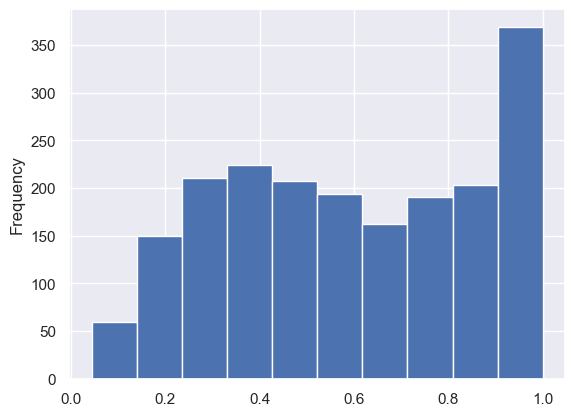

In [217]:
Wrd['Confidence'].plot(kind = 'hist');

### What were the *TOP* 10 Dog Breeds?
* The top 10 dog breeds were able to be deduced by pulling the value counts of the Breed category and performing the head method to display the wanted information. Splitting the top 10 value counts into a list for the numerical counts and then pulled the index for the top 10 and used the list method to display the breed names.
* The Golden Retriever was the breed who was tweeted the most.

In [218]:
top_ten = Wrd.Breed.value_counts().head(10)
print(top_ten)

Golden Retriever      137
Labrador Retriever    94 
Pembroke              88 
Chihuahua             78 
Pug                   54 
Chow                  41 
Samoyed               40 
Pomeranian            38 
Toy Poodle            37 
Malamute              29 
Name: Breed, dtype: int64


In [219]:
Dogs = list(top_ten.index)
print(Dogs)

['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug', 'Chow', 'Samoyed', 'Pomeranian', 'Toy Poodle', 'Malamute']


In [220]:
counts = list(top_ten)
print(counts)

[137, 94, 88, 78, 54, 41, 40, 38, 37, 29]


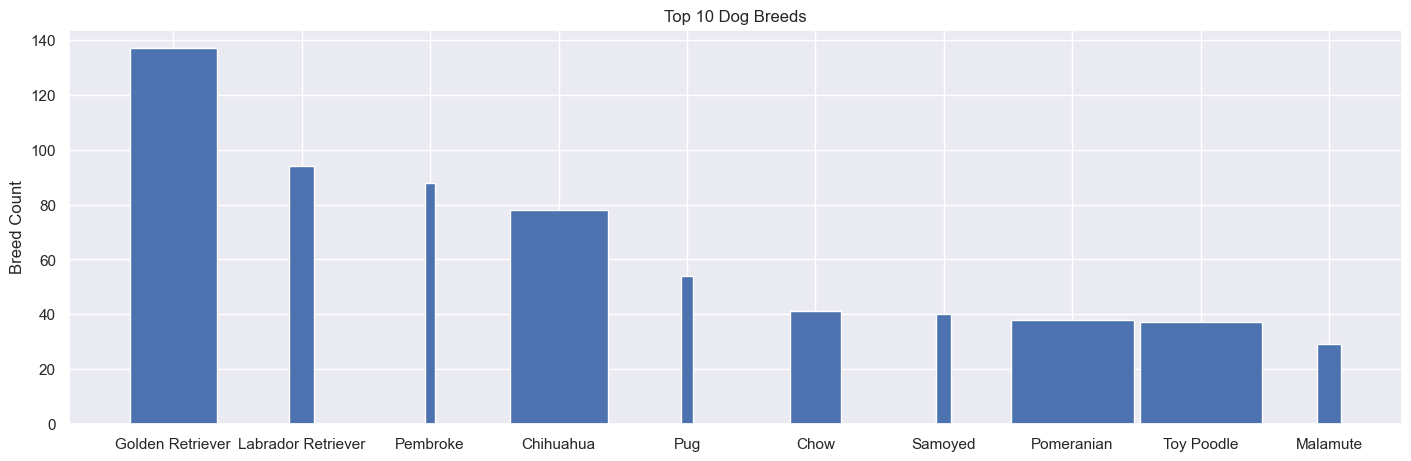

In [221]:
fig, ax = plt.subplots(figsize=(14, 4.5), layout='constrained')
dogs =  ['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug', 'Chow',
         'Samoyed', 'Pomeranian', 'Toy Poodle', 'Malamute']
counts = [137, 94, 88, 78, 54, 41, 40, 38, 37, 29]

ax.set_ylabel('Breed Count')

ax.set_title('Top 10 Dog Breeds')

ax.bar(Dogs, counts, np.random.rand(len(Dogs)));

### What Nicknames were used the most?

*To see which nickname was used the most on the tweets using the value counts method displays said information.
*Using a pie chart allows you to see the proportional differences between the different nicknames used.

In [222]:
top_nick = Wrd.Nickname.value_counts()
print(top_nick)

pupper     221
doggo      66 
puppo      28 
floofer    4  
Name: Nickname, dtype: int64


Text(0.5, 1.0, 'Most Common Nicknames')

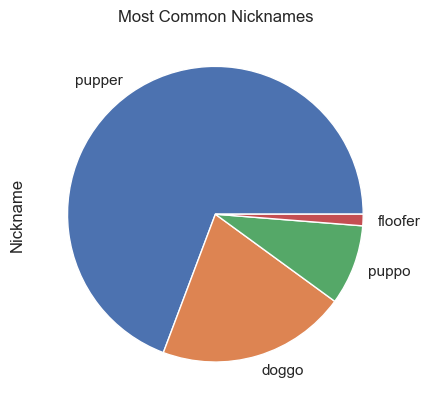

In [223]:
labels = np.full(len(Wrd.Nickname.value_counts()), '', dtype = object)
labels[0] = 'pupper'
labels[1] = 'doggo'
labels[2] = 'puppo'
labels[3] = 'floofer'
Wrd.Nickname.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most Common Nicknames')

### Visualization

### Where the predictions more true or more false?

Text(0.5, 1.0, 'Which prediction was chosen the most?')

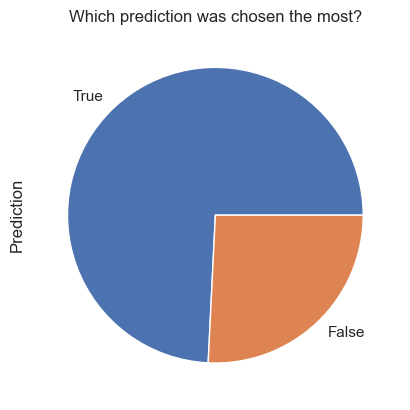

In [224]:
#creating an array named labels with the same length as the number of values in the prediction column
labels = np.full(len(twitter_image.Prediction.value_counts()), '', dtype = object)
labels[0] = 'True'
labels[1] = 'False'

twitter_image.Prediction.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Which prediction was chosen the most?')

The visualization displays that the predictions made were mostly accurately as opposed to the false predictions.

The visualizations and various dataframes has shown me that there were more tweets that actually held images of dogs as opposed to tweets that didnt have a dog image in them.